# zadanie 1

In [1]:
import pandas as pd

df = pd.DataFrame({'Value': [x for x in range(1,7)], 'Probability': [1/6 for x in range(1,7)]})
df

,Value,Probability
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


# zadanie 2

In [2]:


import numpy as np

# Generuj próbki z rozkładu Bernoulliego
bernoulli_samples = np.random.choice(df['Value'], 100, p=df['Probability'])

# Generuj próbki z rozkładu dwumianowego
binomial_samples = np.random.binomial(n=1, p=df['Probability'].values[0], size=100)

# Generuj próbki z rozkładu Poissona
poisson_samples = np.random.poisson(lam=np.sum(df['Value'] * df['Probability']), size=100)

# Wyświetl wyniki
print(f"Bernoulli Samples:\n{bernoulli_samples}")
print(f"\nBinomial Samples:\n{binomial_samples}")
print(f"\nPoisson Samples:\n{poisson_samples}")



Bernoulli Samples:
[4 6 3 5 3 3 6 2 1 5 6 5 4 2 1 2 5 3 5 5 2 3 3 2 3 6 6 6 2 1 1 6 5 2 1 5 3
 5 6 4 5 1 3 4 1 2 4 5 6 2 2 5 4 3 3 3 4 6 2 1 2 3 6 2 4 3 2 6 4 2 3 4 1 6
 5 5 1 2 3 6 1 2 4 6 4 1 3 5 6 4 4 5 3 5 2 1 1 5 6 2]

Binomial Samples:
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0]

Poisson Samples:
[1 1 4 2 4 2 5 4 2 5 6 4 3 6 1 3 3 2 2 5 2 0 2 1 4 4 5 6 5 0 5 4 2 1 5 4 3
 4 5 3 3 3 5 4 1 2 3 4 0 4 5 4 5 1 1 2 1 3 4 4 3 1 1 7 4 1 5 3 6 4 3 4 4 1
 4 7 9 2 1 8 6 9 2 3 5 5 3 2 4 6 3 5 1 3 4 3 3 4 2 5]


# zadanie 3

In [3]:
from scipy.stats import describe, kurtosis, skew

def calculate_statistics(samples, distribution_name):
    print(f"\nStatistics for {distribution_name} Samples:")
    stats = describe(samples)
    print("Mean:", stats.mean)
    print("Variance:", stats.variance)
    print("Kurtosis:", kurtosis(samples))
    print("Skewness:", skew(samples))

calculate_statistics(bernoulli_samples, "Bernoulli")
calculate_statistics(binomial_samples, "Binomial")
calculate_statistics(poisson_samples, "Poisson")


Statistics for Bernoulli Samples:
Mean: 3.54
Variance: 2.8771717171717173
Kurtosis: -1.2792562514148234
Skewness: 0.018332109749806445

Statistics for Binomial Samples:
Mean: 0.26
Variance: 0.19434343434343435
Kurtosis: -0.8024948024948015
Skewness: 1.0943058062101279

Statistics for Poisson Samples:
Mean: 3.45
Variance: 3.542929292929293
Kurtosis: 0.2676649009428429
Skewness: 0.45726426655424013


# zadanie 4

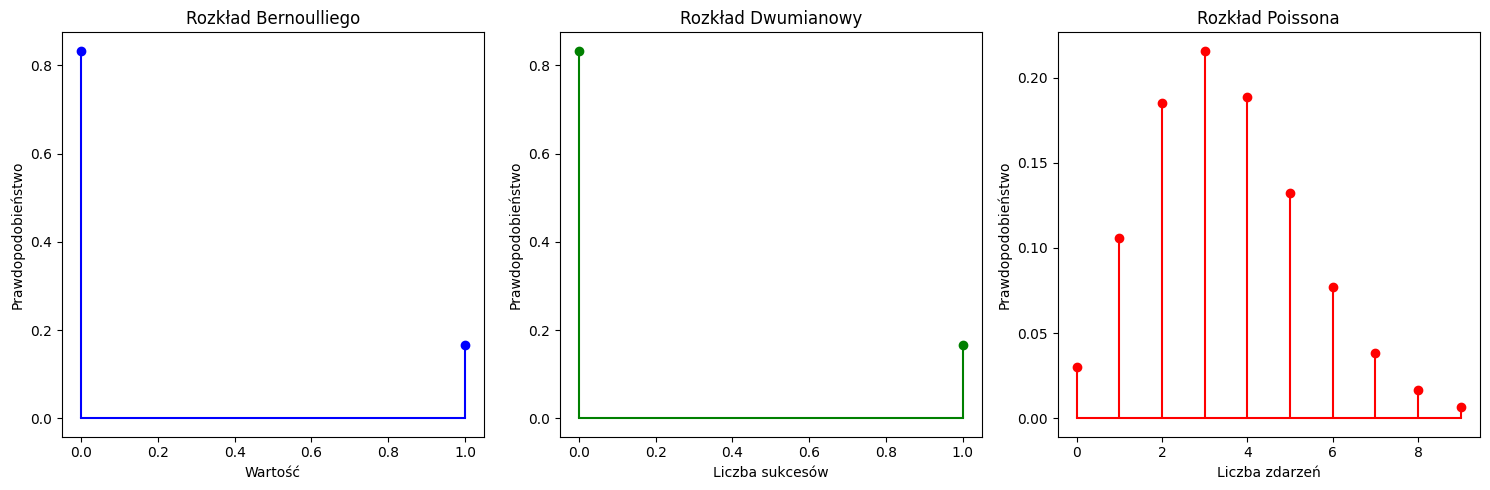

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, poisson

# Funkcje generujące rozkłady prawdopodobieństwa
bernoulli_dist = bernoulli(p=df['Probability'].values[0])
binomial_dist = binom(n=1, p=df['Probability'].values[0])
poisson_dist = poisson(mu=np.sum(df['Value'] * df['Probability']))

# Wygeneruj punkty do narysowania rozkładów prawdopodobieństwa
x_bernoulli = np.linspace(0, 1, 2)
x_binomial = np.arange(0, 2)
x_poisson = np.arange(0, 10)

# Wykresy rozkładów prawdopodobieństwa
plt.figure(figsize=(15, 5))

# Rozkład Bernoulliego
plt.subplot(1, 3, 1)
plt.stem(x_bernoulli, bernoulli_dist.pmf(x_bernoulli), basefmt='b-', markerfmt='bo', linefmt='b-')
plt.title('Rozkład Bernoulliego')
plt.xlabel('Wartość')
plt.ylabel('Prawdopodobieństwo')

# Rozkład dwumianowy
plt.subplot(1, 3, 2)
plt.stem(x_binomial, binomial_dist.pmf(x_binomial), basefmt='g-', markerfmt='go', linefmt='g-')
plt.title('Rozkład Dwumianowy')
plt.xlabel('Liczba sukcesów')
plt.ylabel('Prawdopodobieństwo')

# Rozkład Poissona
plt.subplot(1, 3, 3)
plt.stem(x_poisson, poisson_dist.pmf(x_poisson), basefmt='r-', markerfmt='ro', linefmt='r-')
plt.title('Rozkład Poissona')
plt.xlabel('Liczba zdarzeń')
plt.ylabel('Prawdopodobieństwo')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()